In [1]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
plt.rcParams['xtick.labelsize']  = 18
plt.rcParams['ytick.labelsize']  = 18
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family']      = 'STIXGeneral'
plt.rcParams['axes.labelsize']   = 20
plt.rcParams['axes.titlesize']   = 20
plt.rcParams['font.size']        = 10
plt.rcParams['legend.fontsize']  = 20
plt.rcParams.update({'figure.autolayout': True})
#import scienceplots
#plt.style.use(['science','ieee'])

from tqdm import tqdm
import random
import os
import time
import h5py
from datetime import datetime


import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Conv2DTranspose

# Import auxiliary libraries

import auxLib; importlib.reload(auxLib)

Importing library...
Library successfully imported
Importing library...
Library successfully imported


<module 'auxLib' from 'd:\\Facultad\\Doctorado\\Proyectos\\paper\\auxLib.py'>

# Main variables

In [2]:
L = 40

densities = [0.55, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.7, 0.8, 0.9, 1.0]

densities_str = ['055','06', '061', '062', '063', '064', '065', '07', '08', '09','1']

first_neurons = [i for i in range(1,11)]
middle_neurons = [20 * i for i in range(1,6)]
last_neurons = [50 * i for i in range(3,21)]

neurons = first_neurons + middle_neurons + last_neurons

seed = 15

callbacks = auxLib.myCallback() # to be able to stop training if accuracy is high enough

In [3]:
training = ['para','ferro']

modelsfolder, resultsfolder = auxLib.folders(directory=None, training=training)

In [4]:
data = auxLib.SyntheticImagesGen(training=training, L=L)

# Generate synthetic data

train_images, train_labels = data.dataGenerator(10000)
test_images, test_labels = data.dataGenerator(1000)

train_images = train_images.reshape((10000, L * L))
test_images = test_images.reshape((1000, L * L))

Generating synthetic data...


Done!
Elapsed time: 0.4755899906158447 seconds
Generating synthetic data...
Done!
Elapsed time: 0.04441046714782715 seconds


# Training

In [5]:
for neuron in tqdm(neurons, desc=f"Generating DNN models", unit="neuron"):
    np.random.seed(seed)
    if neuron==1 or neuron==2:
        kernel_regularizer=tf.keras.regularizers.l2(0.001)
    else:   
        kernel_regularizer=tf.keras.regularizers.l2(0.01)

    dnn = auxLib.DenseNeuralNetworkGen() # Initializing. It generates the model

    dnn.build_model((L*L,), num_classes=2, layers=[
    {'type': 'dense', 'units': neuron, 'activation': 'relu', 'kernel_regularizer': kernel_regularizer},
    {'type': 'dropout', 'rate': 0.2},
    {'type': 'dense', 'units': 2, 'activation': 'softmax'} #2 is the number of classes: Paramagnetic and ferromagnetic
    ])

    dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    dnn.summary()

    dnn.fit(train_images, train_labels, 
            epochs=50, batch_size=20,
            validation_data=(test_images, test_labels), 
            callbacks=[callbacks],
            verbose=False)
    
    dnn.save_weights(f'dnn_para_ferro_n{neuron}_DO02', directory=modelsfolder) # name of the model (exclude the 'weights' and the extension)
    dnn.save_model(f'dnn_para_ferro_n{neuron}_DO02', directory=modelsfolder)

Generating DNN models:   0%|          | 0/33 [00:00<?, ?neuron/s]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1601      
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
 dense_1 (Dense)             (None, 2)                 4         
                                                                 
Total params: 1605 (6.27 KB)
Trainable params: 1605 (6.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


C:\Users\Usuario\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
Generating DNN models:   3%|▎         | 1/33 [00:47<25:11, 47.24s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n1_DO02.h5
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 3202      
                                                                 
 dropout_1 (Dropout)         (None, 2)                 0         
                                                                 
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
Total params: 3208 (12.53 KB)
Trainable params: 3208 (12.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:   6%|▌         | 2/33 [01:34<24:31, 47.47s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n2_DO02.h5
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 4803      
                                                                 
 dropout_2 (Dropout)         (None, 3)                 0         
                                                                 
 dense_5 (Dense)             (None, 2)                 8         
                                                                 
Total params: 4811 (18.79 KB)
Trainable params: 4811 (18.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:   9%|▉         | 3/33 [02:27<24:54, 49.82s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n3_DO02.h5
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 6404      
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_7 (Dense)             (None, 2)                 10        
                                                                 
Total params: 6414 (25.05 KB)
Trainable params: 6414 (25.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  12%|█▏        | 4/33 [03:15<23:41, 49.03s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n4_DO02.h5
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 5)                 8005      
                                                                 
 dropout_4 (Dropout)         (None, 5)                 0         
                                                                 
 dense_9 (Dense)             (None, 2)                 12        
                                                                 
Total params: 8017 (31.32 KB)
Trainable params: 8017 (31.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  15%|█▌        | 5/33 [03:18<15:06, 32.38s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n5_DO02.h5
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 6)                 9606      
                                                                 
 dropout_5 (Dropout)         (None, 6)                 0         
                                                                 
 dense_11 (Dense)            (None, 2)                 14        
                                                                 
Total params: 9620 (37.58 KB)
Trainable params: 9620 (37.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  18%|█▊        | 6/33 [03:21<10:06, 22.45s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n6_DO02.h5
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 7)                 11207     
                                                                 
 dropout_6 (Dropout)         (None, 7)                 0         
                                                                 
 dense_13 (Dense)            (None, 2)                 16        
                                                                 
Total params: 11223 (43.84 KB)
Trainable params: 11223 (43.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  21%|██        | 7/33 [03:23<06:50, 15.81s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n7_DO02.h5
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 8)                 12808     
                                                                 
 dropout_7 (Dropout)         (None, 8)                 0         
                                                                 
 dense_15 (Dense)            (None, 2)                 18        
                                                                 
Total params: 12826 (50.10 KB)
Trainable params: 12826 (50.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  24%|██▍       | 8/33 [03:25<04:47, 11.49s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n8_DO02.h5
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 9)                 14409     
                                                                 
 dropout_8 (Dropout)         (None, 9)                 0         
                                                                 
 dense_17 (Dense)            (None, 2)                 20        
                                                                 
Total params: 14429 (56.36 KB)
Trainable params: 14429 (56.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  27%|██▋       | 9/33 [03:27<03:25,  8.57s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n9_DO02.h5
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                16010     
                                                                 
 dropout_9 (Dropout)         (None, 10)                0         
                                                                 
 dense_19 (Dense)            (None, 2)                 22        
                                                                 
Total params: 16032 (62.62 KB)
Trainable params: 16032 (62.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  30%|███       | 10/33 [03:33<02:54,  7.58s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n10_DO02.h5
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 20)                32020     
                                                                 
 dropout_10 (Dropout)        (None, 20)                0         
                                                                 
 dense_21 (Dense)            (None, 2)                 42        
                                                                 
Total params: 32062 (125.24 KB)
Trainable params: 32062 (125.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  33%|███▎      | 11/33 [03:35<02:10,  5.91s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n20_DO02.h5
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 40)                64040     
                                                                 
 dropout_11 (Dropout)        (None, 40)                0         
                                                                 
 dense_23 (Dense)            (None, 2)                 82        
                                                                 
Total params: 64122 (250.48 KB)
Trainable params: 64122 (250.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  36%|███▋      | 12/33 [03:40<01:57,  5.58s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n40_DO02.h5
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 60)                96060     
                                                                 
 dropout_12 (Dropout)        (None, 60)                0         
                                                                 
 dense_25 (Dense)            (None, 2)                 122       
                                                                 
Total params: 96182 (375.71 KB)
Trainable params: 96182 (375.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  39%|███▉      | 13/33 [03:42<01:34,  4.71s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n60_DO02.h5
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 80)                128080    
                                                                 
 dropout_13 (Dropout)        (None, 80)                0         
                                                                 
 dense_27 (Dense)            (None, 2)                 162       
                                                                 
Total params: 128242 (500.95 KB)
Trainable params: 128242 (500.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  42%|████▏     | 14/33 [03:46<01:21,  4.31s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n80_DO02.h5
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 100)               160100    
                                                                 
 dropout_14 (Dropout)        (None, 100)               0         
                                                                 
 dense_29 (Dense)            (None, 2)                 202       
                                                                 
Total params: 160302 (626.18 KB)
Trainable params: 160302 (626.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  45%|████▌     | 15/33 [03:49<01:12,  4.02s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n100_DO02.h5
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 150)               240150    
                                                                 
 dropout_15 (Dropout)        (None, 150)               0         
                                                                 
 dense_31 (Dense)            (None, 2)                 302       
                                                                 
Total params: 240452 (939.27 KB)
Trainable params: 240452 (939.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  48%|████▊     | 16/33 [03:56<01:21,  4.77s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n150_DO02.h5
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 200)               320200    
                                                                 
 dropout_16 (Dropout)        (None, 200)               0         
                                                                 
 dense_33 (Dense)            (None, 2)                 402       
                                                                 
Total params: 320602 (1.22 MB)
Trainable params: 320602 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  52%|█████▏    | 17/33 [04:06<01:44,  6.51s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n200_DO02.h5
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 250)               400250    
                                                                 
 dropout_17 (Dropout)        (None, 250)               0         
                                                                 
 dense_35 (Dense)            (None, 2)                 502       
                                                                 
Total params: 400752 (1.53 MB)
Trainable params: 400752 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  55%|█████▍    | 18/33 [04:14<01:41,  6.79s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n250_DO02.h5
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 300)               480300    
                                                                 
 dropout_18 (Dropout)        (None, 300)               0         
                                                                 
 dense_37 (Dense)            (None, 2)                 602       
                                                                 
Total params: 480902 (1.83 MB)
Trainable params: 480902 (1.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  58%|█████▊    | 19/33 [04:35<02:36, 11.16s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n300_DO02.h5
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 350)               560350    
                                                                 
 dropout_19 (Dropout)        (None, 350)               0         
                                                                 
 dense_39 (Dense)            (None, 2)                 702       
                                                                 
Total params: 561052 (2.14 MB)
Trainable params: 561052 (2.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  61%|██████    | 20/33 [04:58<03:12, 14.84s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n350_DO02.h5
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 400)               640400    
                                                                 
 dropout_20 (Dropout)        (None, 400)               0         
                                                                 
 dense_41 (Dense)            (None, 2)                 802       
                                                                 
Total params: 641202 (2.45 MB)
Trainable params: 641202 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  64%|██████▎   | 21/33 [05:26<03:45, 18.78s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n400_DO02.h5
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 450)               720450    
                                                                 
 dropout_21 (Dropout)        (None, 450)               0         
                                                                 
 dense_43 (Dense)            (None, 2)                 902       
                                                                 
Total params: 721352 (2.75 MB)
Trainable params: 721352 (2.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  67%|██████▋   | 22/33 [05:37<02:58, 16.22s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n450_DO02.h5
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 500)               800500    
                                                                 
 dropout_22 (Dropout)        (None, 500)               0         
                                                                 
 dense_45 (Dense)            (None, 2)                 1002      
                                                                 
Total params: 801502 (3.06 MB)
Trainable params: 801502 (3.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  70%|██████▉   | 23/33 [05:59<02:59, 17.92s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n500_DO02.h5
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 550)               880550    
                                                                 
 dropout_23 (Dropout)        (None, 550)               0         
                                                                 
 dense_47 (Dense)            (None, 2)                 1102      
                                                                 
Total params: 881652 (3.36 MB)
Trainable params: 881652 (3.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  73%|███████▎  | 24/33 [06:13<02:31, 16.82s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n550_DO02.h5
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 600)               960600    
                                                                 
 dropout_24 (Dropout)        (None, 600)               0         
                                                                 
 dense_49 (Dense)            (None, 2)                 1202      
                                                                 
Total params: 961802 (3.67 MB)
Trainable params: 961802 (3.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  76%|███████▌  | 25/33 [06:26<02:05, 15.69s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n600_DO02.h5
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 650)               1040650   
                                                                 
 dropout_25 (Dropout)        (None, 650)               0         
                                                                 
 dense_51 (Dense)            (None, 2)                 1302      
                                                                 
Total params: 1041952 (3.97 MB)
Trainable params: 1041952 (3.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  79%|███████▉  | 26/33 [06:40<01:46, 15.22s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n650_DO02.h5
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 700)               1120700   
                                                                 
 dropout_26 (Dropout)        (None, 700)               0         
                                                                 
 dense_53 (Dense)            (None, 2)                 1402      
                                                                 
Total params: 1122102 (4.28 MB)
Trainable params: 1122102 (4.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  82%|████████▏ | 27/33 [06:55<01:30, 15.12s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n700_DO02.h5
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 750)               1200750   
                                                                 
 dropout_27 (Dropout)        (None, 750)               0         
                                                                 
 dense_55 (Dense)            (None, 2)                 1502      
                                                                 
Total params: 1202252 (4.59 MB)
Trainable params: 1202252 (4.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  85%|████████▍ | 28/33 [07:11<01:16, 15.33s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n750_DO02.h5
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 800)               1280800   
                                                                 
 dropout_28 (Dropout)        (None, 800)               0         
                                                                 
 dense_57 (Dense)            (None, 2)                 1602      
                                                                 
Total params: 1282402 (4.89 MB)
Trainable params: 1282402 (4.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  88%|████████▊ | 29/33 [07:27<01:02, 15.75s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n800_DO02.h5
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 850)               1360850   
                                                                 
 dropout_29 (Dropout)        (None, 850)               0         
                                                                 
 dense_59 (Dense)            (None, 2)                 1702      
                                                                 
Total params: 1362552 (5.20 MB)
Trainable params: 1362552 (5.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  91%|█████████ | 30/33 [07:47<00:50, 16.86s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n850_DO02.h5
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 900)               1440900   
                                                                 
 dropout_30 (Dropout)        (None, 900)               0         
                                                                 
 dense_61 (Dense)            (None, 2)                 1802      
                                                                 
Total params: 1442702 (5.50 MB)
Trainable params: 1442702 (5.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  94%|█████████▍| 31/33 [08:07<00:35, 17.91s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n900_DO02.h5
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 950)               1520950   
                                                                 
 dropout_31 (Dropout)        (None, 950)               0         
                                                                 
 dense_63 (Dense)            (None, 2)                 1902      
                                                                 
Total params: 1522852 (5.81 MB)
Trainable params: 1522852 (5.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  97%|█████████▋| 32/33 [08:48<00:24, 24.83s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n950_DO02.h5
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 1000)              1601000   
                                                                 
 dropout_32 (Dropout)        (None, 1000)              0         
                                                                 
 dense_65 (Dense)            (None, 2)                 2002      
                                                                 
Total params: 1603002 (6.11 MB)
Trainable params: 1603002 (6.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models: 100%|██████████| 33/33 [09:31<00:00, 17.31s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-18\dnn_para_ferro_n1000_DO02.h5


# Predictions

In [6]:
# Initializing loader and saver

loader_init = auxLib.loader_and_saver(os.getcwd())

# Loading simulated images

sim_images, temperature = loader_init.simulatedImages(-1)

Loading simulated images...


Loading arrays:   0%|          | 0/156 [00:00<?, ?array/s]

Loading arrays: 100%|██████████| 156/156 [00:04<00:00, 37.48array/s]

Files loaded!
Data of density p = 1. succesfully loaded.


Predicting: 100%|██████████| 155/155 [00:18<00:00,  8.29repetitions/s]


Prediction for 1 neurons in hidden layer
T_c = 2.2065442834607807


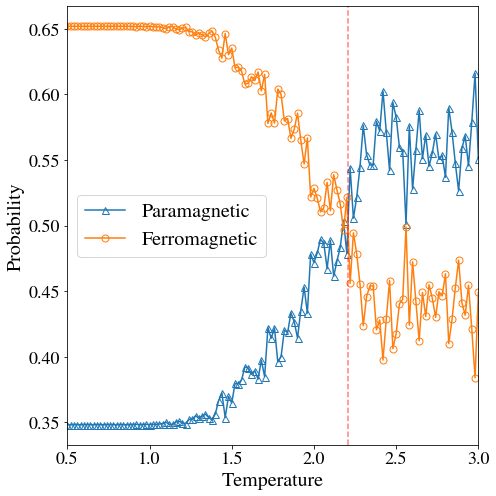

Predicting: 100%|██████████| 155/155 [00:17<00:00,  8.62repetitions/s]


Prediction for 2 neurons in hidden layer
T_c = 2.383690261687483


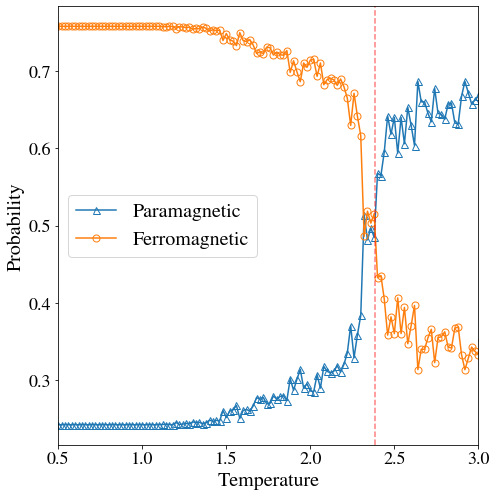

Predicting: 100%|██████████| 155/155 [00:19<00:00,  7.98repetitions/s]


Prediction for 3 neurons in hidden layer
T_c = 2.2026649291480225


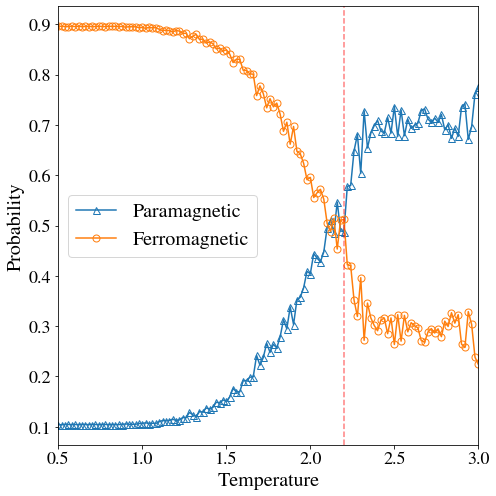

Predicting: 100%|██████████| 155/155 [00:18<00:00,  8.53repetitions/s]


Prediction for 4 neurons in hidden layer
T_c = 2.4443185896141033


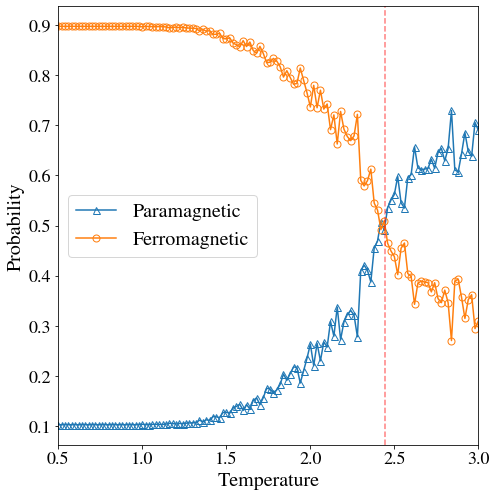

Predicting: 100%|██████████| 155/155 [00:18<00:00,  8.48repetitions/s]


Prediction for 5 neurons in hidden layer
T_c = 2.3983399813366177


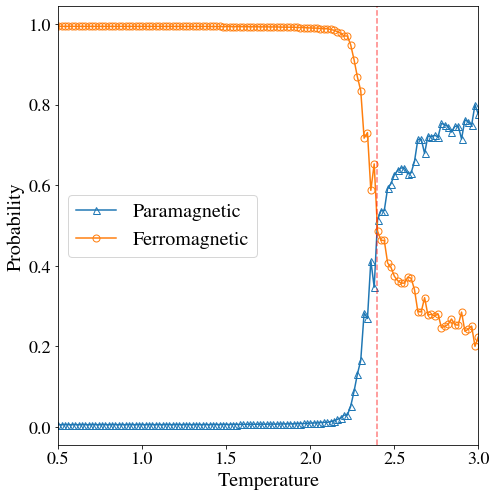

Predicting: 100%|██████████| 155/155 [00:18<00:00,  8.54repetitions/s]


Prediction for 6 neurons in hidden layer
T_c = 2.3957564409066174


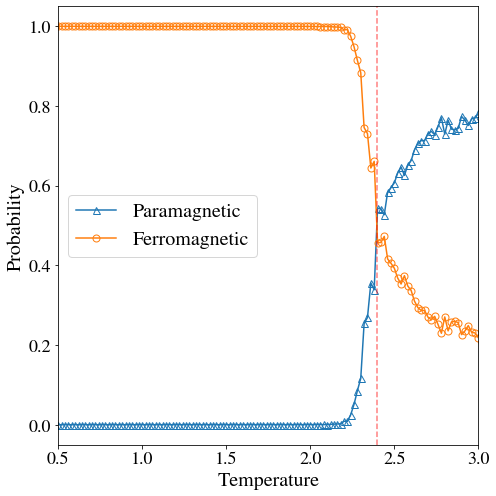

Predicting: 100%|██████████| 155/155 [00:20<00:00,  7.48repetitions/s]


Prediction for 7 neurons in hidden layer
T_c = 2.439107088524999


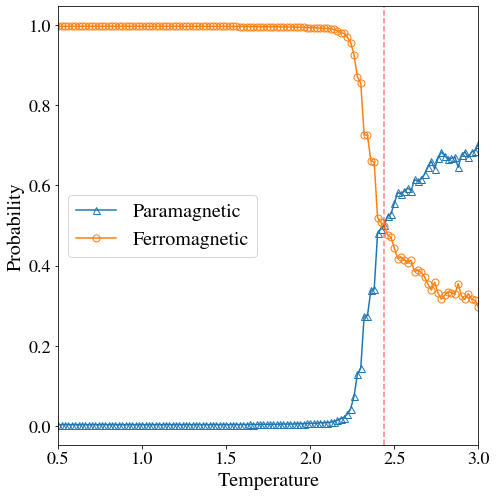

Predicting: 100%|██████████| 155/155 [00:27<00:00,  5.62repetitions/s]


Prediction for 8 neurons in hidden layer
T_c = 2.3953757134464455


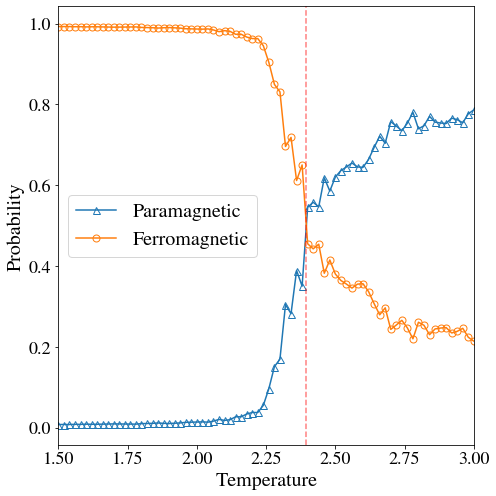

Predicting: 100%|██████████| 155/155 [00:33<00:00,  4.68repetitions/s]


Prediction for 9 neurons in hidden layer
T_c = 2.3770364937042316


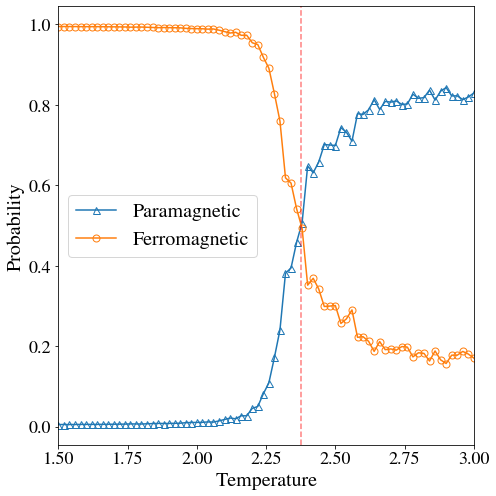

Predicting: 100%|██████████| 155/155 [00:21<00:00,  7.10repetitions/s]


Prediction for 10 neurons in hidden layer
T_c = 2.3859048248172314


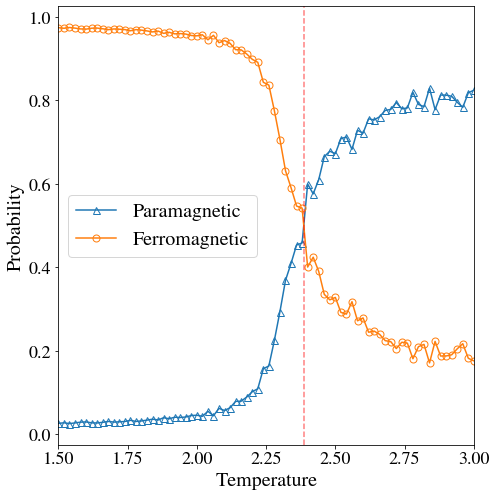

Predicting: 100%|██████████| 155/155 [00:21<00:00,  7.34repetitions/s]


Prediction for 20 neurons in hidden layer
T_c = 2.3809282561701948


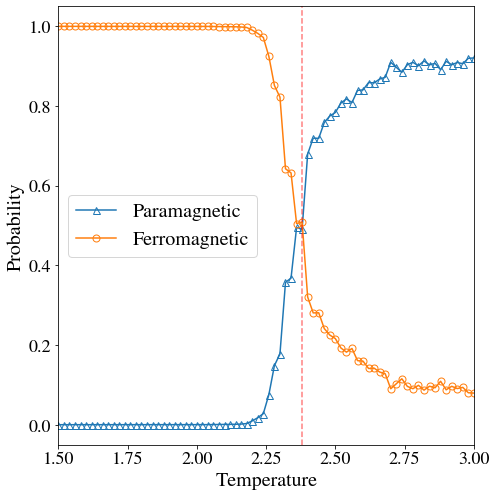

Predicting: 100%|██████████| 155/155 [00:24<00:00,  6.44repetitions/s]


Prediction for 40 neurons in hidden layer
T_c = 2.603917377474174


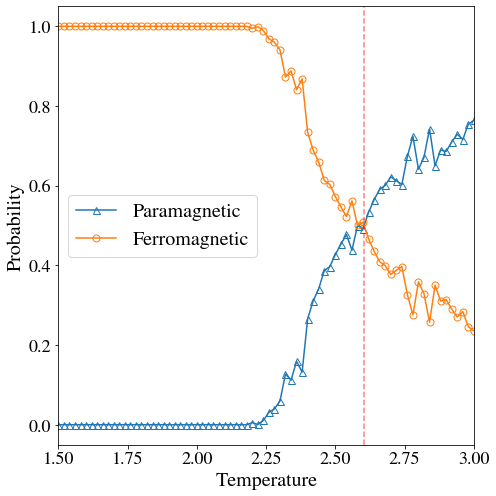

Predicting: 100%|██████████| 155/155 [00:23<00:00,  6.59repetitions/s]


Prediction for 60 neurons in hidden layer
T_c = 2.3665849023239365


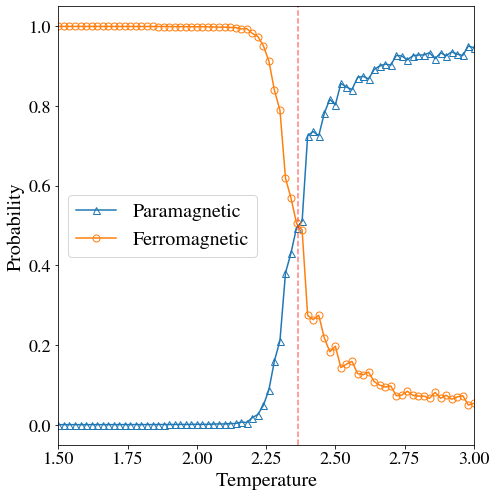

Predicting: 100%|██████████| 155/155 [00:19<00:00,  8.04repetitions/s]


Prediction for 80 neurons in hidden layer
T_c = 2.4801045931223276


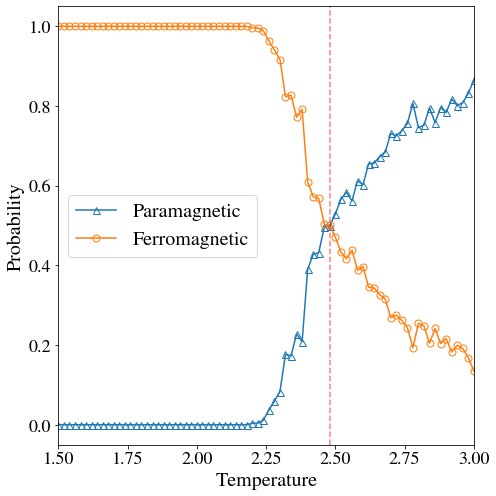

Predicting: 100%|██████████| 155/155 [00:25<00:00,  6.11repetitions/s]


Prediction for 100 neurons in hidden layer
T_c = 2.444867390523143


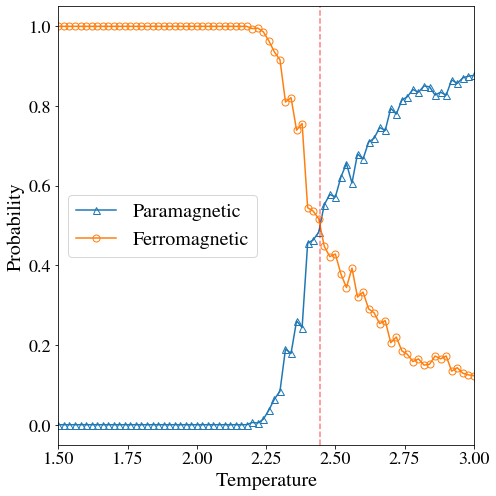

Predicting: 100%|██████████| 155/155 [00:23<00:00,  6.55repetitions/s]


Prediction for 150 neurons in hidden layer
T_c = 2.3533313058983505


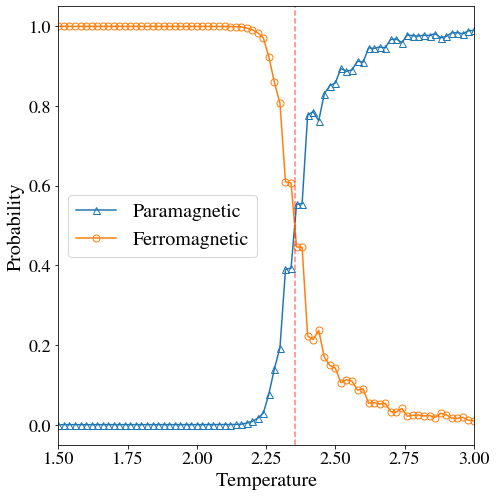

Predicting: 100%|██████████| 155/155 [00:21<00:00,  7.09repetitions/s]


Prediction for 200 neurons in hidden layer
T_c = 2.3499408521655645


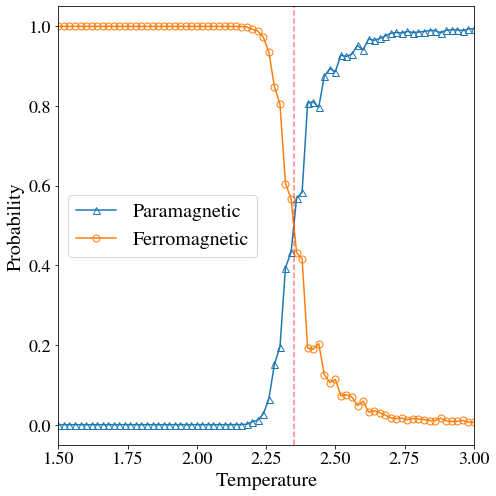

Predicting: 100%|██████████| 155/155 [00:23<00:00,  6.57repetitions/s]


Prediction for 250 neurons in hidden layer
T_c = 2.3966988090282975


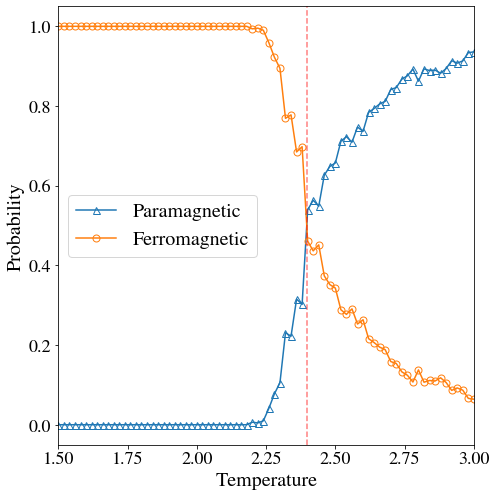

Predicting: 100%|██████████| 155/155 [00:22<00:00,  6.99repetitions/s]


Prediction for 300 neurons in hidden layer
T_c = 2.3114759577820547


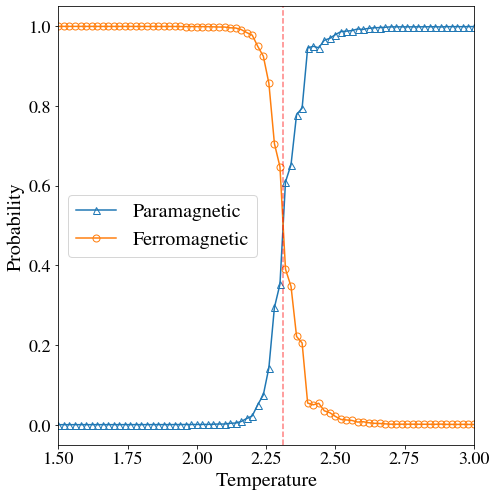

Predicting: 100%|██████████| 155/155 [00:21<00:00,  7.28repetitions/s]


Prediction for 350 neurons in hidden layer
T_c = 2.3177378955017325


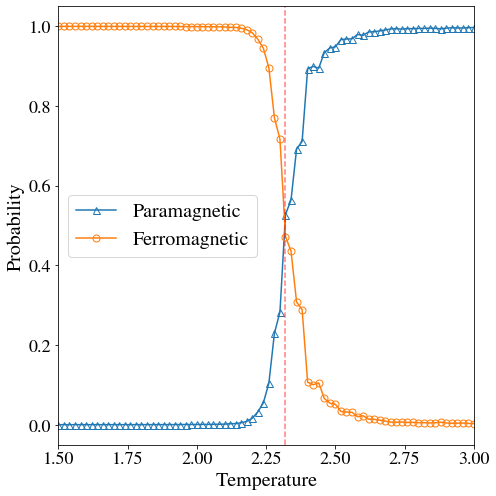

Predicting: 100%|██████████| 155/155 [00:21<00:00,  7.28repetitions/s]


Prediction for 400 neurons in hidden layer
T_c = 2.3871908705739138


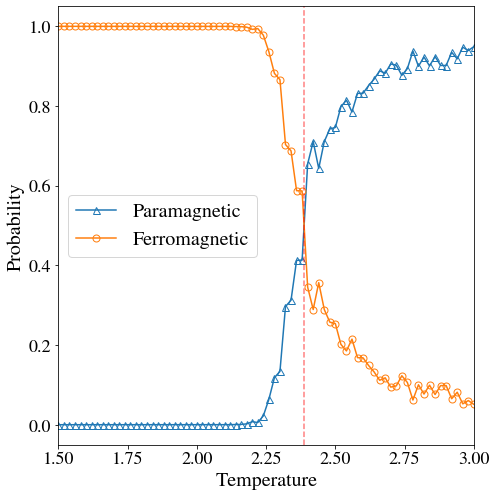

Predicting: 100%|██████████| 155/155 [00:22<00:00,  7.00repetitions/s]


Prediction for 450 neurons in hidden layer
T_c = 2.348351327922653


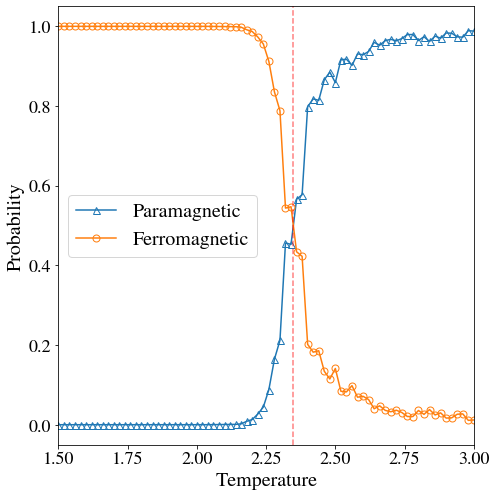

Predicting: 100%|██████████| 155/155 [00:22<00:00,  6.95repetitions/s]


Prediction for 500 neurons in hidden layer
T_c = 2.310173233496321


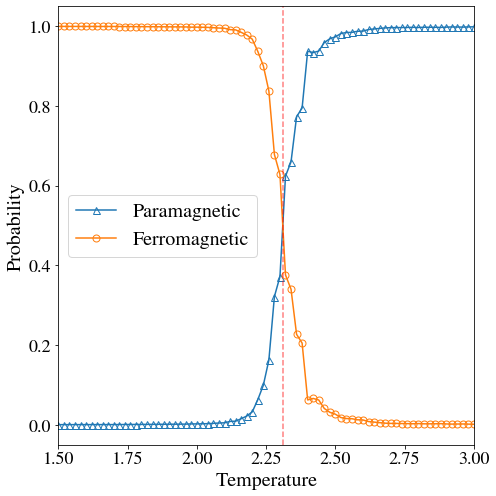

Predicting: 100%|██████████| 155/155 [00:24<00:00,  6.39repetitions/s]


Prediction for 550 neurons in hidden layer
T_c = 2.3845689564453347


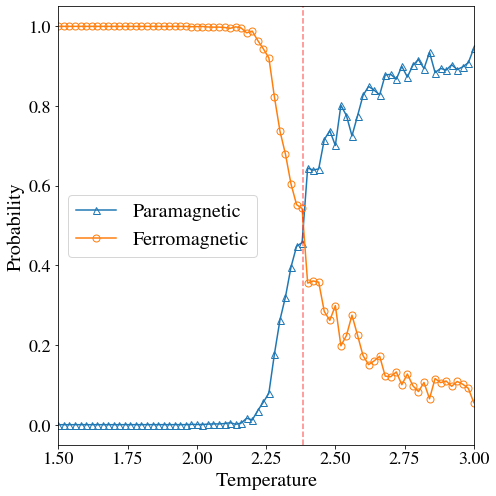

Predicting: 100%|██████████| 155/155 [00:23<00:00,  6.65repetitions/s]


Prediction for 600 neurons in hidden layer
T_c = 2.319791291350282


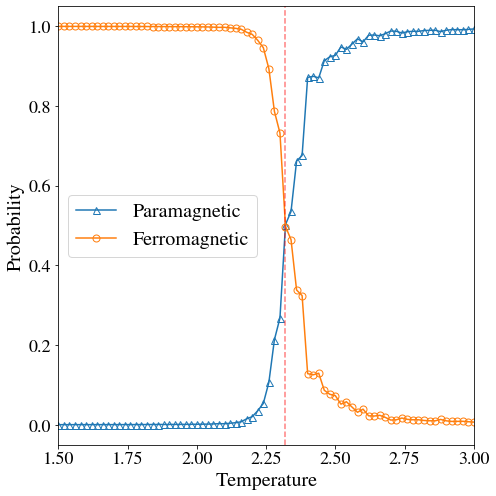

Predicting: 100%|██████████| 155/155 [00:24<00:00,  6.42repetitions/s]


Prediction for 650 neurons in hidden layer
T_c = 2.383543486166608


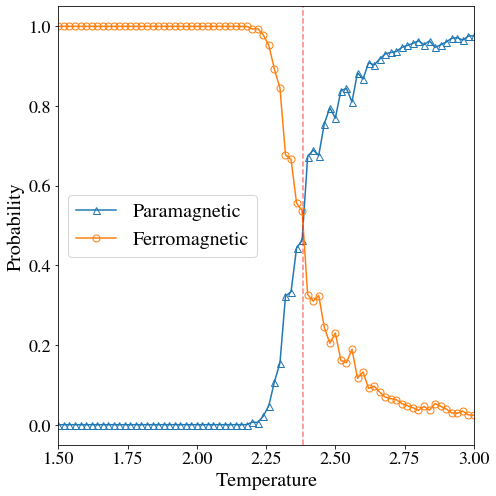

Predicting: 100%|██████████| 155/155 [00:23<00:00,  6.50repetitions/s]


Prediction for 700 neurons in hidden layer
T_c = 2.318757473555213


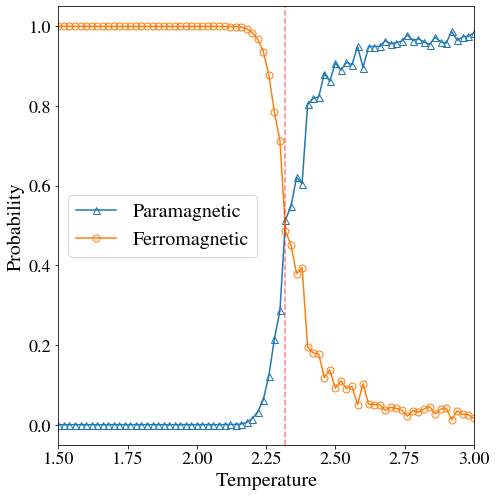

Predicting: 100%|██████████| 155/155 [00:23<00:00,  6.51repetitions/s]


Prediction for 750 neurons in hidden layer
T_c = 2.316084752532693


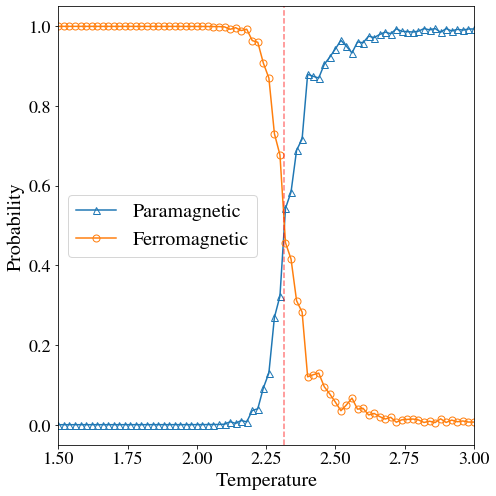

Predicting: 100%|██████████| 155/155 [00:24<00:00,  6.29repetitions/s]


Prediction for 800 neurons in hidden layer
T_c = 2.3115859199238318


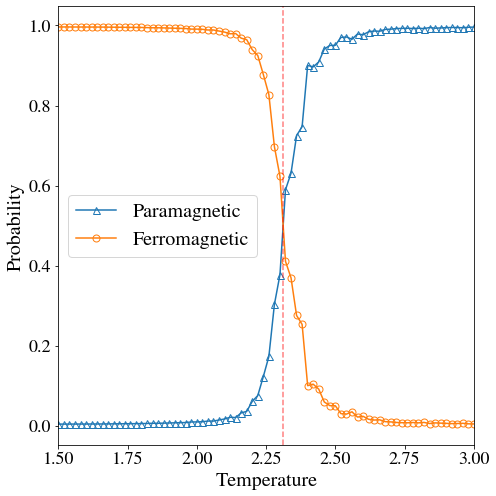

Predicting: 100%|██████████| 155/155 [00:25<00:00,  6.14repetitions/s]


Prediction for 850 neurons in hidden layer
T_c = 2.3194278173134646


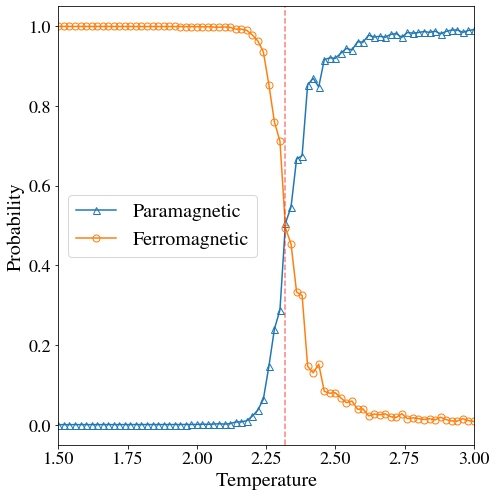

Predicting: 100%|██████████| 155/155 [00:26<00:00,  5.81repetitions/s]


Prediction for 900 neurons in hidden layer
T_c = 2.3137762271954627


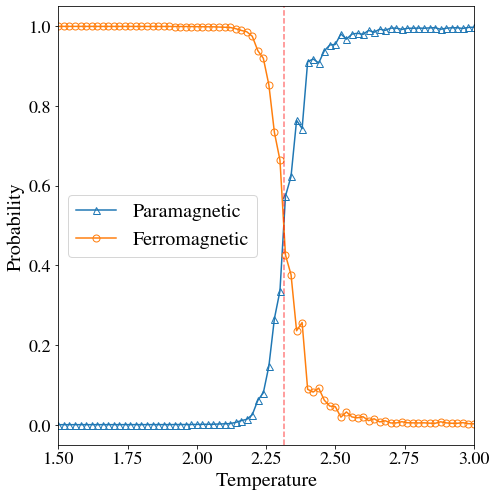

Predicting: 100%|██████████| 155/155 [00:25<00:00,  6.10repetitions/s]


Prediction for 950 neurons in hidden layer
T_c = 2.308352038077897


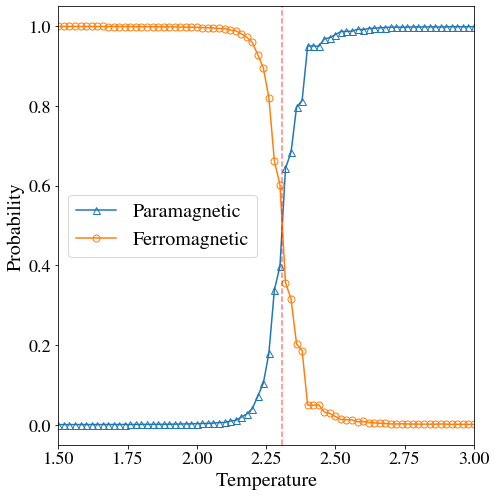

Predicting: 100%|██████████| 155/155 [00:26<00:00,  5.93repetitions/s]


Prediction for 1000 neurons in hidden layer
T_c = 2.311940606840648


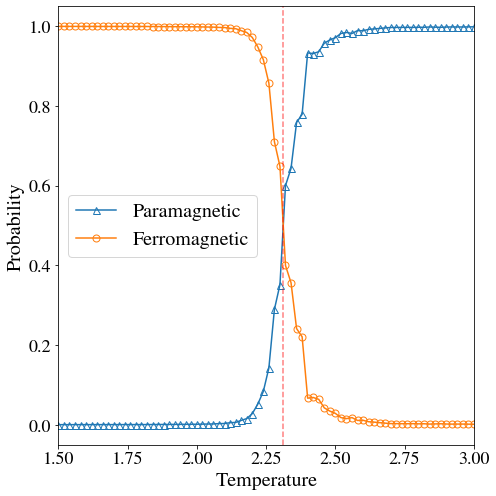

In [7]:
critical_temperatures = []

for neuron in neurons:
    index = neurons.index(neuron)

    model_path = os.path.join(modelsfolder, f'dnn_para_ferro_n{neuron}_DO02.h5')

    dnn = keras.models.load_model(model_path)

    prediction = auxLib.predictor(L, dnn, sim_images, neuron,
								training=['para', 'ferro'],
                                directory=resultsfolder, 
                                reshape = True, 
                                verbose=False, 
                                save_prediction=True)

    para, ferro = prediction.T

    print(f'Prediction for {neuron} neurons in hidden layer')

    plt.figure(figsize=(7, 7))
    plt.plot(temperature, para, '^-', label='Paramagnetic', markerfacecolor='none', markersize=7)
    plt.plot(temperature, ferro, 'o-', label='Ferromagnetic', markerfacecolor='none', markersize=7)
    
    if neuron<8:
        plt.xlim((0.5, 3))
    else:
        plt.xlim((1.5, 3))
    plt.xlabel('Temperature')
    plt.ylabel('Probability')
    plt.legend()

    if max(ferro)<0.5:
        tc = 0
    else:
        index_half = np.where(ferro > 0.5)[0][-1]
        if index_half == 250:
            index_half = 249
        # Interpolation:
        tc = temperature[index_half] + (ferro[index_half]-0.5)*(temperature[index_half+1] - temperature[index_half]) / (ferro[index_half] - ferro[index_half+1])
        plt.axvline(x=tc,  color = 'red', linestyle = '--', alpha = 0.5)

    critical_temperatures.append(tc)
    print(f'T_c = {tc}')
    plt.savefig(os.path.join(resultsfolder, f'{neuron}neurons.pdf'))
    plt.show()

In [8]:
temp = pd.DataFrame((np.concatenate((np.array(neurons).reshape(len(neurons),1), 
                                    np.array(critical_temperatures).reshape(len(neurons),1)),axis=1)), 
                                    columns=['Neurons','Temperature'])
temp.to_csv(os.path.join(resultsfolder, 'critical_temperatures.csv'), index=False)

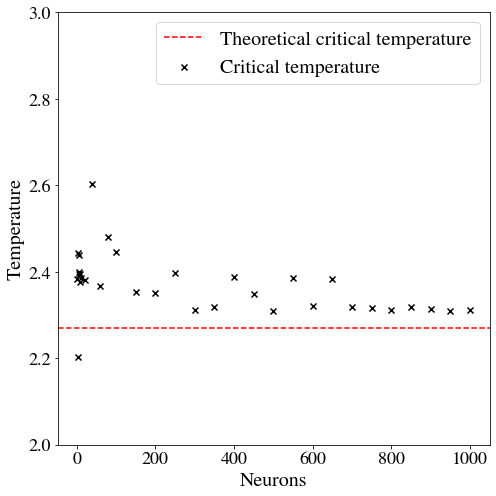

In [17]:
temp = pd.read_csv(os.path.join(resultsfolder, f'critical_temperatures.csv'))

plt.figure(figsize=(7, 7))
plt.scatter(temp['Neurons'][1:],temp['Temperature'][1:], marker='x', color='black', label='Critical temperature')
plt.axhline(y=2.269, color = 'red', linestyle = '--', label = 'Theoretical critical temperature')
plt.xlabel('Neurons')
plt.ylabel('Temperature')

#plt.text(800, 2.25, rf'Tc ={2.269}', color='black', 
#        verticalalignment='top', horizontalalignment='left', fontsize=20)

plt.ylim((2, 3))
plt.legend(loc='upper right')
plt.savefig(os.path.join(os.getcwd(), resultsfolder, 'critical_temperatures.pdf'))
plt.show()

# Half of height criteria

In [10]:
from scipy.optimize import curve_fit

In [11]:
saving_folder = os.path.join(os.getcwd(), 'DNN', 'Half_of_height', datetime.now().strftime('%Y-%m-%d'), 'training_para-ferro')

os.makedirs(saving_folder, exist_ok = True)

In [12]:
def constant_func(x, b):
    return np.full_like(x, b)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

names = ['Paramagnetic', 'Ferromagnetic', 'Néel', 'Stripe']

Prediction for 1 neurons in hidden layer
Lower bound (Paramagnetic): 0.3481942486763
Higher bound (Paramagnetic): 0.5708890288474502
Half of height (Paramagnetic): 0.4595416387618751
Critical temperature (Paramagnetic): 2.12
Lower bound (Ferromagnetic): 0.6518069136142731
Higher bound (Ferromagnetic): 0.4291111844414992
Half of height (Ferromagnetic): 0.5404590490278862
Critical temperature (Ferromagnetic): 2.12


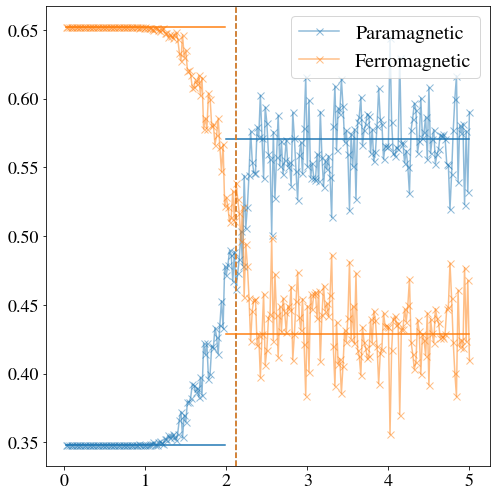

Prediction for 2 neurons in hidden layer
Lower bound (Paramagnetic): 0.2426515966653823
Higher bound (Paramagnetic): 0.6661511951801824
Half of height (Paramagnetic): 0.45440139592278234
Critical temperature (Paramagnetic): 2.34
Lower bound (Ferromagnetic): 0.7573484182357788
Higher bound (Ferromagnetic): 0.3338485710761126
Half of height (Ferromagnetic): 0.5455984946559457
Critical temperature (Ferromagnetic): 2.34


<Figure size 432x288 with 0 Axes>

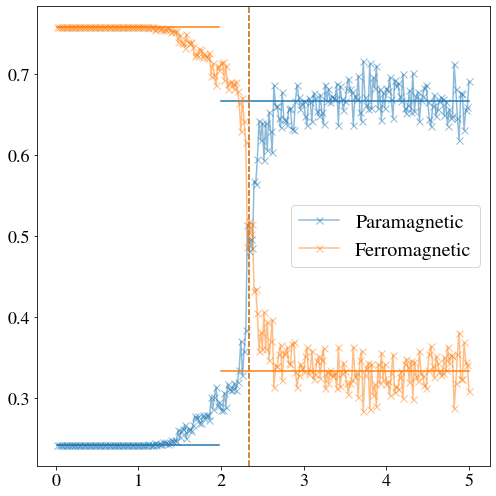

Prediction for 3 neurons in hidden layer
Lower bound (Paramagnetic): 0.10447407364845271
Higher bound (Paramagnetic): 0.716073135534303
Half of height (Paramagnetic): 0.41027360459137785
Critical temperature (Paramagnetic): 1.98
Lower bound (Ferromagnetic): 0.8955262756345377
Higher bound (Ferromagnetic): 0.2839269830884462
Half of height (Ferromagnetic): 0.589726629361492
Critical temperature (Ferromagnetic): 1.98


<Figure size 432x288 with 0 Axes>

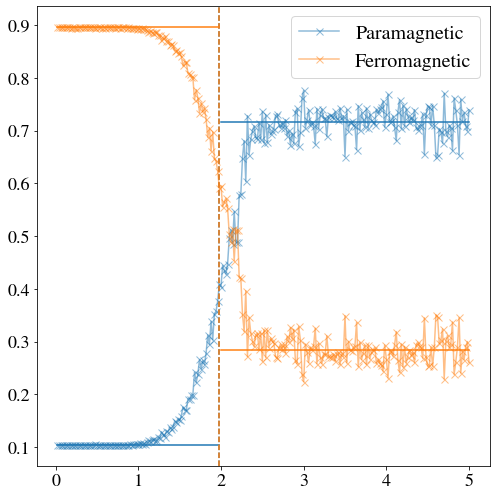

Prediction for 4 neurons in hidden layer
Lower bound (Paramagnetic): 0.10262487947940827
Higher bound (Paramagnetic): 0.7270949775091464
Half of height (Paramagnetic): 0.41485992849427733
Critical temperature (Paramagnetic): 2.34
Lower bound (Ferromagnetic): 0.8973745226857809
Higher bound (Ferromagnetic): 0.27290504907701874
Half of height (Ferromagnetic): 0.5851397858813998
Critical temperature (Ferromagnetic): 2.34


<Figure size 432x288 with 0 Axes>

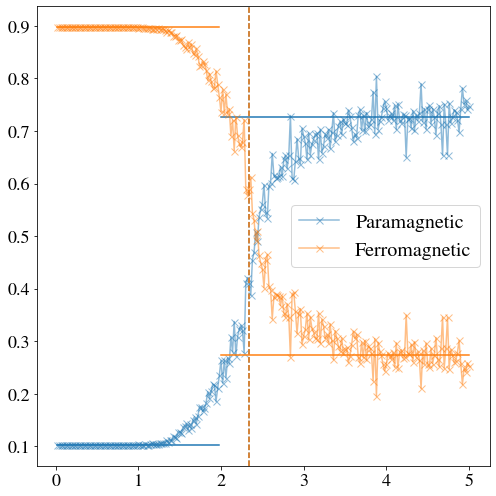

Prediction for 5 neurons in hidden layer
Lower bound (Paramagnetic): 0.005881642671301912
Higher bound (Paramagnetic): 0.8203444223774001
Half of height (Paramagnetic): 0.413113032524351
Critical temperature (Paramagnetic): 2.36
Lower bound (Ferromagnetic): 0.9941191935539118
Higher bound (Ferromagnetic): 0.1796554706826733
Half of height (Ferromagnetic): 0.5868873321182926
Critical temperature (Ferromagnetic): 2.36


<Figure size 432x288 with 0 Axes>

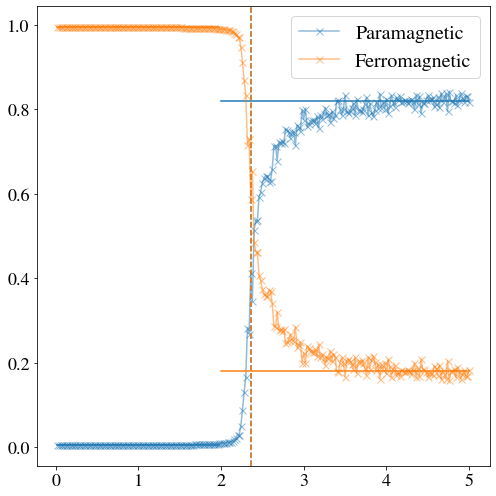

Prediction for 6 neurons in hidden layer
Lower bound (Paramagnetic): 0.000169513902219426
Higher bound (Paramagnetic): 0.8159940967368806
Half of height (Paramagnetic): 0.40808180531955
Critical temperature (Paramagnetic): 2.36
Lower bound (Ferromagnetic): 0.9998304438591
Higher bound (Ferromagnetic): 0.18400590968888997
Half of height (Ferromagnetic): 0.5919181767739949
Critical temperature (Ferromagnetic): 2.36


<Figure size 432x288 with 0 Axes>

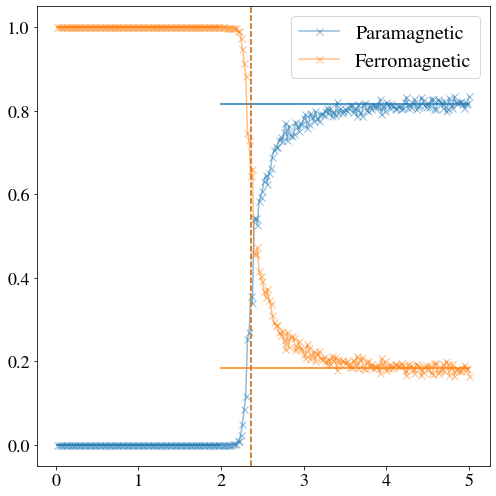

Prediction for 7 neurons in hidden layer
Lower bound (Paramagnetic): 0.002885641632601572
Higher bound (Paramagnetic): 0.7207378230836796
Half of height (Paramagnetic): 0.36181173235814057
Critical temperature (Paramagnetic): 2.38
Lower bound (Ferromagnetic): 0.9971141302585539
Higher bound (Ferromagnetic): 0.27926219678235387
Half of height (Ferromagnetic): 0.6381881635204538
Critical temperature (Ferromagnetic): 2.38


<Figure size 432x288 with 0 Axes>

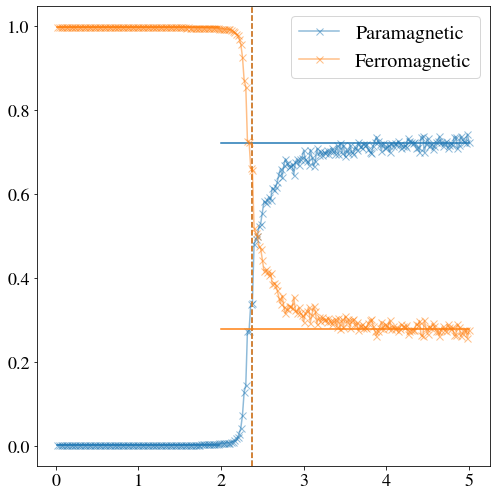

Prediction for 8 neurons in hidden layer
Lower bound (Paramagnetic): 0.006900917738676022
Higher bound (Paramagnetic): 0.830225776223205
Half of height (Paramagnetic): 0.41856334698094055
Critical temperature (Paramagnetic): 2.36
Lower bound (Ferromagnetic): 0.9930991697311401
Higher bound (Ferromagnetic): 0.169774225821682
Half of height (Ferromagnetic): 0.581436697776411
Critical temperature (Ferromagnetic): 2.36


<Figure size 432x288 with 0 Axes>

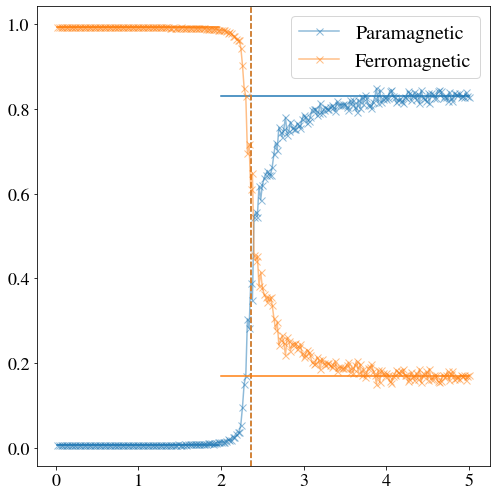

Prediction for 9 neurons in hidden layer
Lower bound (Paramagnetic): 0.004838199308142014
Higher bound (Paramagnetic): 0.8702616095540078
Half of height (Paramagnetic): 0.4375499044310749
Critical temperature (Paramagnetic): 2.36
Lower bound (Ferromagnetic): 0.9951617121696367
Higher bound (Ferromagnetic): 0.12973838927699066
Half of height (Ferromagnetic): 0.5624500507233137
Critical temperature (Ferromagnetic): 2.36


<Figure size 432x288 with 0 Axes>

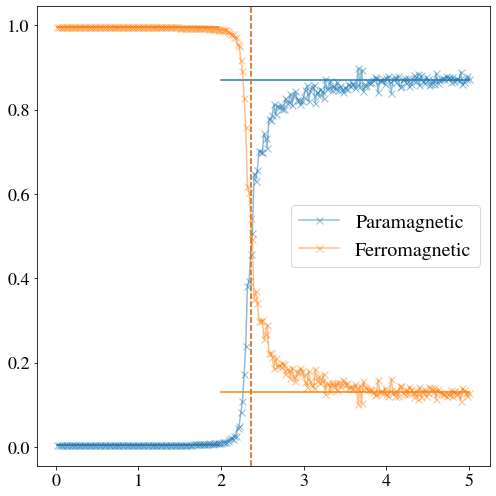

Prediction for 10 neurons in hidden layer
Lower bound (Paramagnetic): 0.02307835444808001
Higher bound (Paramagnetic): 0.8610937104505652
Half of height (Paramagnetic): 0.4420860324493226
Critical temperature (Paramagnetic): 2.36
Lower bound (Ferromagnetic): 0.976920652389476
Higher bound (Ferromagnetic): 0.1389063056174361
Half of height (Ferromagnetic): 0.5579134790034561
Critical temperature (Ferromagnetic): 2.36


<Figure size 432x288 with 0 Axes>

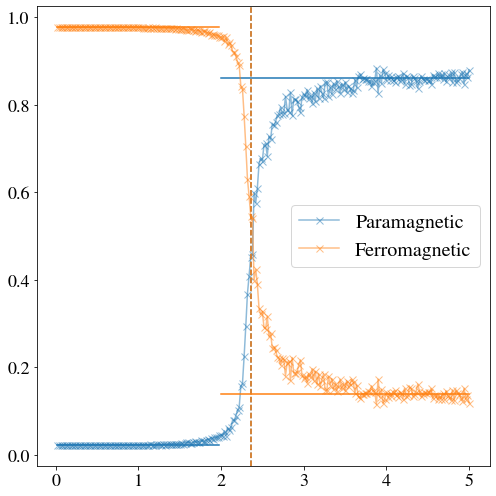

Prediction for 20 neurons in hidden layer
Lower bound (Paramagnetic): 4.485200326598716e-05
Higher bound (Paramagnetic): 0.9398478982495326
Half of height (Paramagnetic): 0.4699463751263993
Critical temperature (Paramagnetic): 2.38
Lower bound (Ferromagnetic): 0.9999561119079589
Higher bound (Ferromagnetic): 0.06015212234708134
Half of height (Ferromagnetic): 0.5300541171275202
Critical temperature (Ferromagnetic): 2.38


<Figure size 432x288 with 0 Axes>

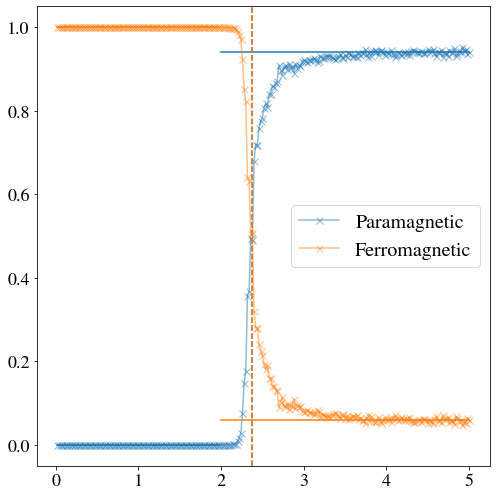

Prediction for 40 neurons in hidden layer
Lower bound (Paramagnetic): 4.360576397384282e-16
Higher bound (Paramagnetic): 0.907023072242534
Half of height (Paramagnetic): 0.4535115361212672
Critical temperature (Paramagnetic): 2.52
Lower bound (Ferromagnetic): 0.9999993443489076
Higher bound (Ferromagnetic): 0.09297691095495575
Half of height (Ferromagnetic): 0.5464881276519317
Critical temperature (Ferromagnetic): 2.52


<Figure size 432x288 with 0 Axes>

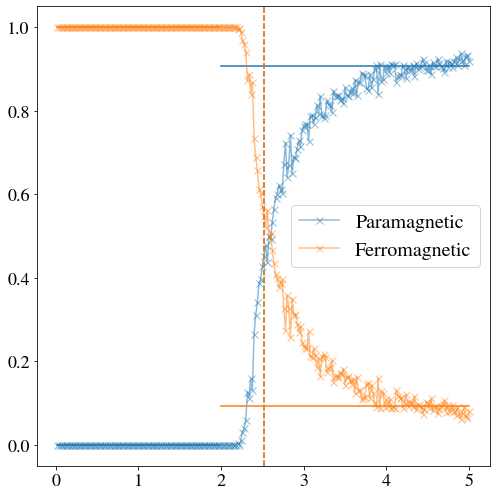

Prediction for 60 neurons in hidden layer
Lower bound (Paramagnetic): 0.000370076448889402
Higher bound (Paramagnetic): 0.9587879426339093
Half of height (Paramagnetic): 0.47957900954139937
Critical temperature (Paramagnetic): 2.36
Lower bound (Ferromagnetic): 0.9996305882930747
Higher bound (Ferromagnetic): 0.04121206547407538
Half of height (Ferromagnetic): 0.520421326883575
Critical temperature (Ferromagnetic): 2.36


<Figure size 432x288 with 0 Axes>

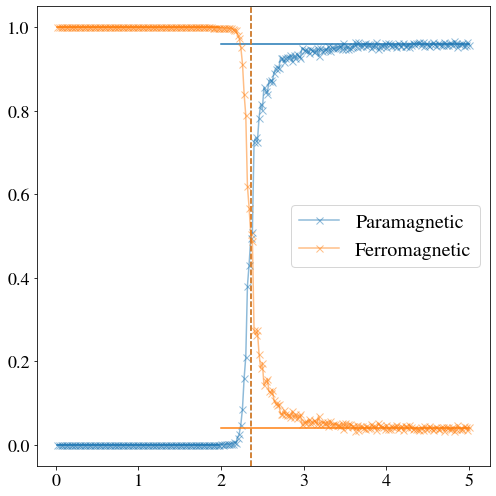

Prediction for 80 neurons in hidden layer
Lower bound (Paramagnetic): 4.985066709650224e-08
Higher bound (Paramagnetic): 0.9253099233494794
Half of height (Paramagnetic): 0.46265498660007326
Critical temperature (Paramagnetic): 2.44
Lower bound (Ferromagnetic): 0.9999988079071044
Higher bound (Ferromagnetic): 0.07469006057845973
Half of height (Ferromagnetic): 0.537344434242782
Critical temperature (Ferromagnetic): 2.44


<Figure size 432x288 with 0 Axes>

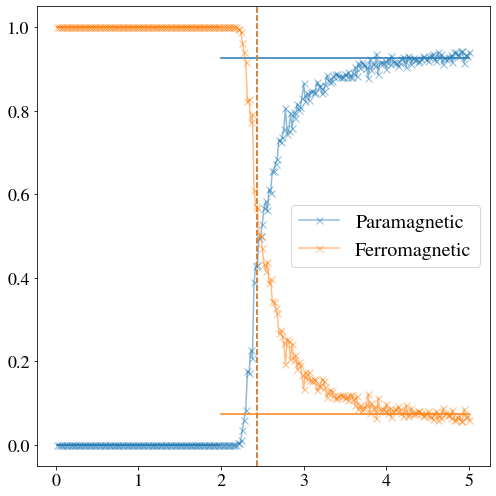

Prediction for 100 neurons in hidden layer
Lower bound (Paramagnetic): 4.001417330812278e-09
Higher bound (Paramagnetic): 0.9513608673039604
Half of height (Paramagnetic): 0.47568043565268886
Critical temperature (Paramagnetic): 2.44
Lower bound (Ferromagnetic): 0.9999993443489076
Higher bound (Ferromagnetic): 0.048639132403859864
Half of height (Ferromagnetic): 0.5243192383763837
Critical temperature (Ferromagnetic): 2.44


<Figure size 432x288 with 0 Axes>

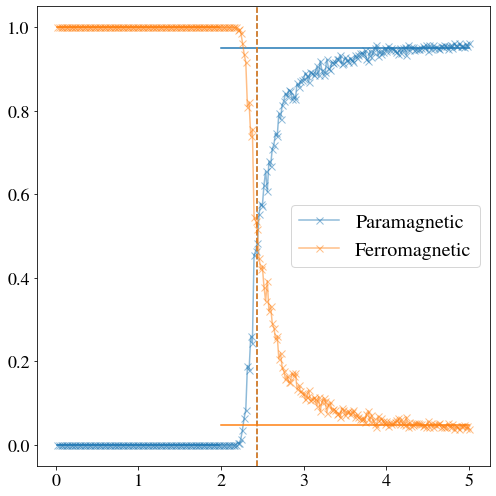

Prediction for 150 neurons in hidden layer
Lower bound (Paramagnetic): 4.4356787548167624e-05
Higher bound (Paramagnetic): 0.9944604121002375
Half of height (Paramagnetic): 0.49725238444389286
Critical temperature (Paramagnetic): 2.36
Lower bound (Ferromagnetic): 0.9999541783332823
Higher bound (Ferromagnetic): 0.0055395583600461595
Half of height (Ferromagnetic): 0.5027468683466643
Critical temperature (Ferromagnetic): 2.36


<Figure size 432x288 with 0 Axes>

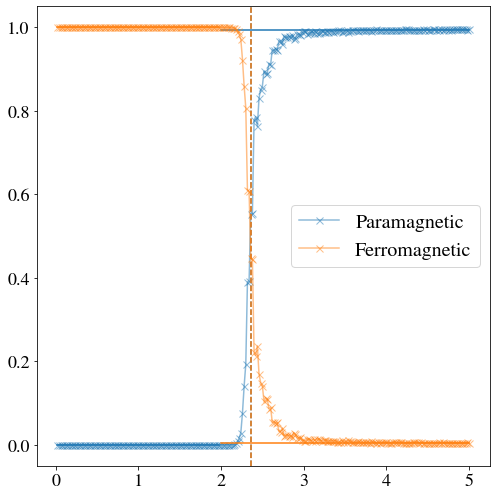

Prediction for 200 neurons in hidden layer
Lower bound (Paramagnetic): 8.061906009970699e-06
Higher bound (Paramagnetic): 0.9968246817588806
Half of height (Paramagnetic): 0.4984163718324453
Critical temperature (Paramagnetic): 2.34
Lower bound (Ferromagnetic): 0.9999903964996337
Higher bound (Ferromagnetic): 0.0031753387417373657
Half of height (Ferromagnetic): 0.5015828676206855
Critical temperature (Ferromagnetic): 2.34


<Figure size 432x288 with 0 Axes>

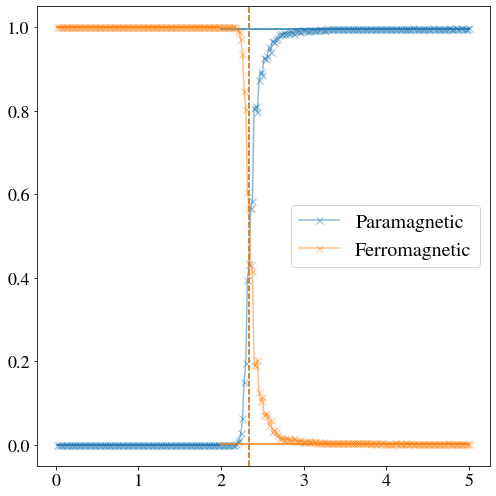

Prediction for 250 neurons in hidden layer
Lower bound (Paramagnetic): 4.691936670297996e-09
Higher bound (Paramagnetic): 0.9703310552764695
Half of height (Paramagnetic): 0.48516552998420304
Critical temperature (Paramagnetic): 2.4
Lower bound (Ferromagnetic): 0.9999993443489076
Higher bound (Ferromagnetic): 0.029668977520629424
Half of height (Ferromagnetic): 0.5148341609347685
Critical temperature (Ferromagnetic): 2.4


<Figure size 432x288 with 0 Axes>

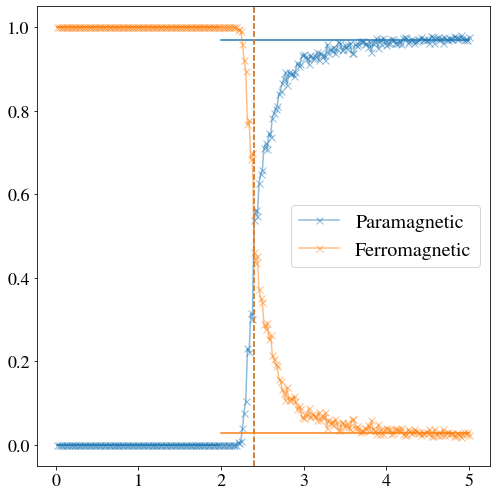

Prediction for 300 neurons in hidden layer
Lower bound (Paramagnetic): 0.00016208887798706598
Higher bound (Paramagnetic): 0.9993813633918749
Half of height (Paramagnetic): 0.499771726134931
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.9998379635810848
Higher bound (Ferromagnetic): 0.0006186155689076236
Half of height (Ferromagnetic): 0.5002282895749962
Critical temperature (Ferromagnetic): 2.32


<Figure size 432x288 with 0 Axes>

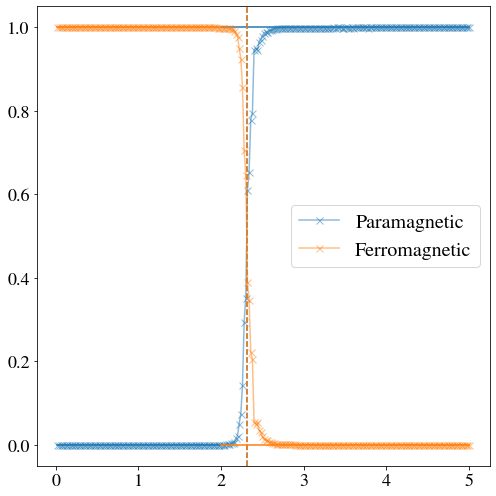

Prediction for 350 neurons in hidden layer
Lower bound (Paramagnetic): 0.000227736820233936
Higher bound (Paramagnetic): 0.9977671597518124
Half of height (Paramagnetic): 0.49899744828602316
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.9997729551792139
Higher bound (Ferromagnetic): 0.0022328470048366294
Half of height (Ferromagnetic): 0.5010029010920253
Critical temperature (Ferromagnetic): 2.32


<Figure size 432x288 with 0 Axes>

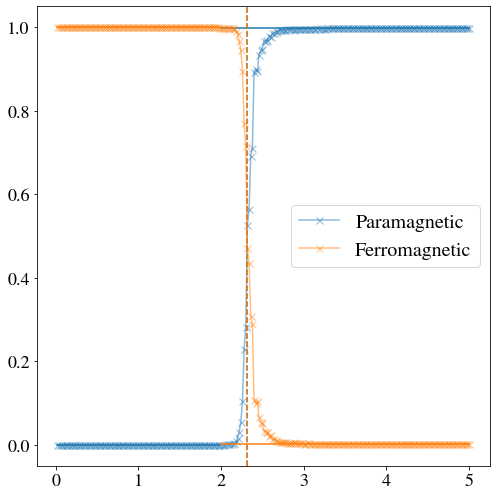

Prediction for 400 neurons in hidden layer
Lower bound (Paramagnetic): 7.178436553658685e-06
Higher bound (Paramagnetic): 0.9779769065332867
Half of height (Paramagnetic): 0.4889920424849202
Critical temperature (Paramagnetic): 2.38
Lower bound (Ferromagnetic): 0.9999929583072661
Higher bound (Ferromagnetic): 0.022023098340279268
Half of height (Ferromagnetic): 0.5110080283237727
Critical temperature (Ferromagnetic): 2.38


<Figure size 432x288 with 0 Axes>

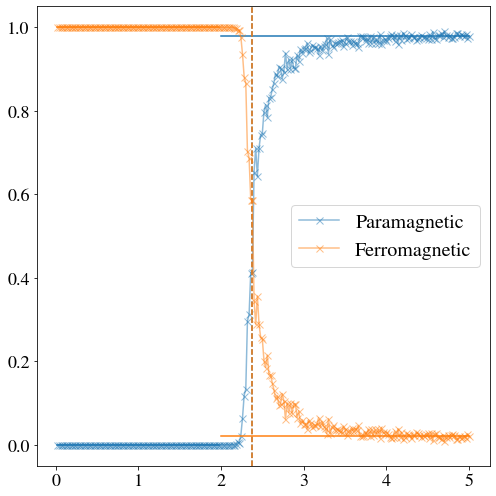

Prediction for 450 neurons in hidden layer
Lower bound (Paramagnetic): 1.5906748049019375e-05
Higher bound (Paramagnetic): 0.9925135315633125
Half of height (Paramagnetic): 0.4962647191556807
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.9999837982654572
Higher bound (Ferromagnetic): 0.007486417860038008
Half of height (Ferromagnetic): 0.5037351080627477
Critical temperature (Ferromagnetic): 2.32


<Figure size 432x288 with 0 Axes>

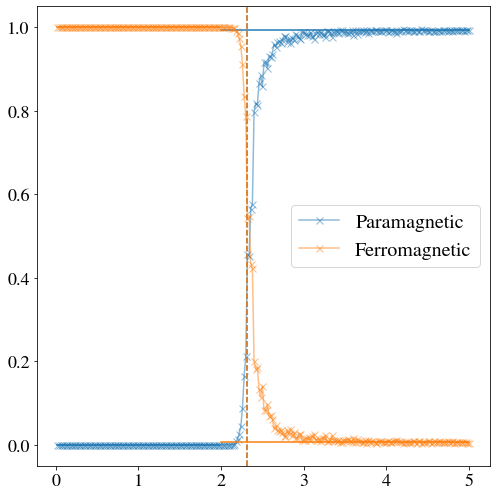

Prediction for 500 neurons in hidden layer
Lower bound (Paramagnetic): 0.000661224919604086
Higher bound (Paramagnetic): 0.998745448449076
Half of height (Paramagnetic): 0.49970333668434
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.9993403851985917
Higher bound (Ferromagnetic): 0.0012545660571833784
Half of height (Ferromagnetic): 0.5002974756278875
Critical temperature (Ferromagnetic): 2.32


<Figure size 432x288 with 0 Axes>

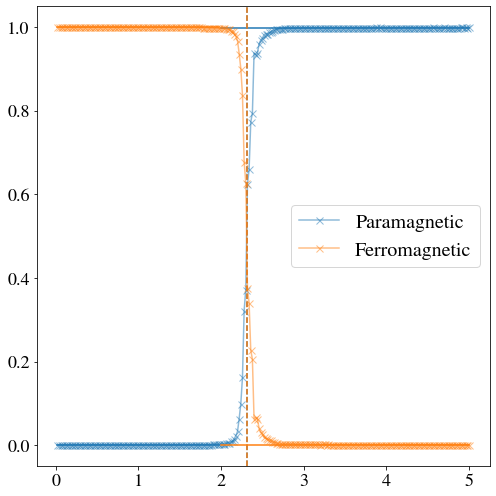

Prediction for 550 neurons in hidden layer
Lower bound (Paramagnetic): 3.814161209447776e-05
Higher bound (Paramagnetic): 0.9718682684149783
Half of height (Paramagnetic): 0.4859532050135364
Critical temperature (Paramagnetic): 2.38
Lower bound (Ferromagnetic): 0.9999608695507048
Higher bound (Ferromagnetic): 0.028131679447037095
Half of height (Ferromagnetic): 0.514046274498871
Critical temperature (Ferromagnetic): 2.38


<Figure size 432x288 with 0 Axes>

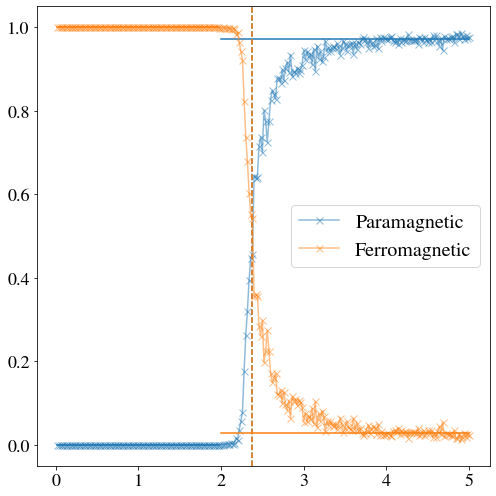

Prediction for 600 neurons in hidden layer
Lower bound (Paramagnetic): 0.000545592899434224
Higher bound (Paramagnetic): 0.9957532286643982
Half of height (Paramagnetic): 0.4981494107819162
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.9994540202617633
Higher bound (Ferromagnetic): 0.004246776565271504
Half of height (Ferromagnetic): 0.5018503984135174
Critical temperature (Ferromagnetic): 2.32


<Figure size 432x288 with 0 Axes>

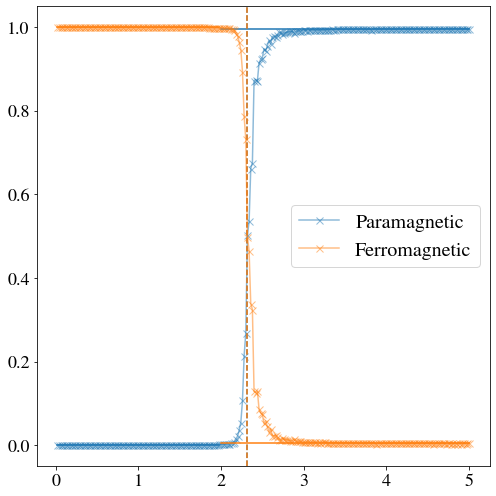

Prediction for 650 neurons in hidden layer
Lower bound (Paramagnetic): 1.3487276783053055e-06
Higher bound (Paramagnetic): 0.9908777931157081
Half of height (Paramagnetic): 0.4954395709216932
Critical temperature (Paramagnetic): 2.38
Lower bound (Ferromagnetic): 0.9999985098838806
Higher bound (Ferromagnetic): 0.009122206729051485
Half of height (Ferromagnetic): 0.5045603583064661
Critical temperature (Ferromagnetic): 2.38


<Figure size 432x288 with 0 Axes>

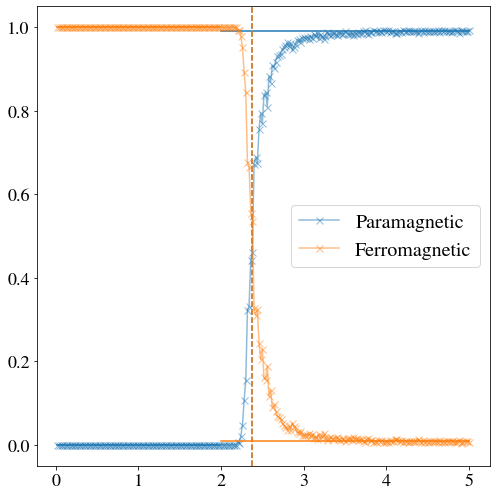

Prediction for 700 neurons in hidden layer
Lower bound (Paramagnetic): 1.5685359812778127e-06
Higher bound (Paramagnetic): 0.9868316708826264
Half of height (Paramagnetic): 0.49341661970930384
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.999997854232788
Higher bound (Ferromagnetic): 0.013168085574339239
Half of height (Ferromagnetic): 0.5065829699035636
Critical temperature (Ferromagnetic): 2.32


<Figure size 432x288 with 0 Axes>

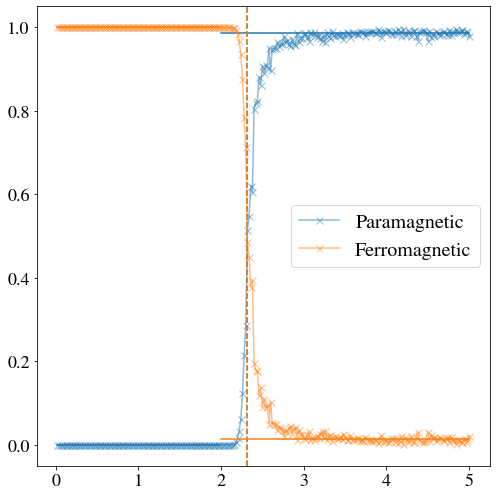

Prediction for 750 neurons in hidden layer
Lower bound (Paramagnetic): 1.6626364558760543e-05
Higher bound (Paramagnetic): 0.9969036275265264
Half of height (Paramagnetic): 0.4984601269455426
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.999983137845993
Higher bound (Ferromagnetic): 0.0030963402687663732
Half of height (Ferromagnetic): 0.5015397390573797
Critical temperature (Ferromagnetic): 2.32


<Figure size 432x288 with 0 Axes>

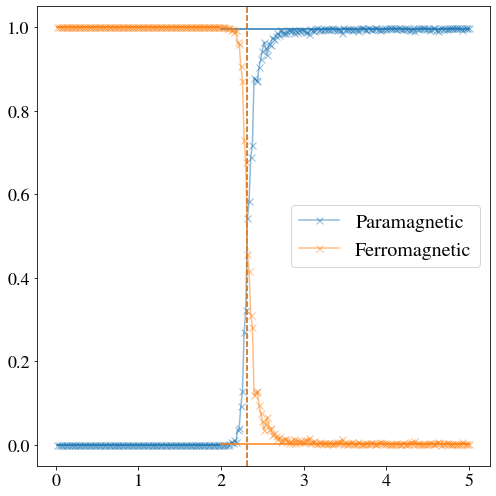

Prediction for 800 neurons in hidden layer
Lower bound (Paramagnetic): 0.002980422200635028
Higher bound (Paramagnetic): 0.9975954153958436
Half of height (Paramagnetic): 0.5002879187982393
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.9970194613933498
Higher bound (Ferromagnetic): 0.0024046226559827234
Half of height (Ferromagnetic): 0.4997120420246663
Critical temperature (Ferromagnetic): 2.32


<Figure size 432x288 with 0 Axes>

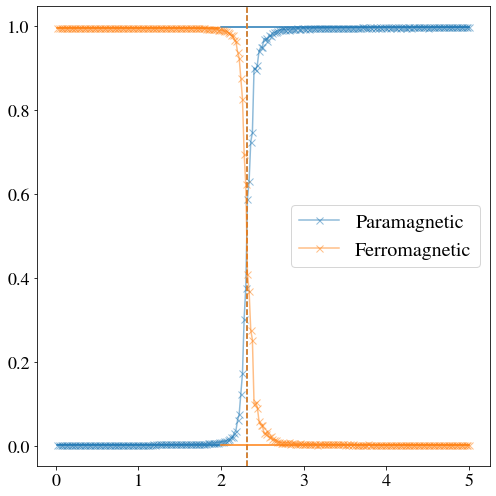

Prediction for 850 neurons in hidden layer
Lower bound (Paramagnetic): 0.000187911485845644
Higher bound (Paramagnetic): 0.995443112709933
Half of height (Paramagnetic): 0.4978155120978893
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.9998121523857113
Higher bound (Ferromagnetic): 0.004556922691839382
Half of height (Ferromagnetic): 0.5021845375387753
Critical temperature (Ferromagnetic): 2.32


<Figure size 432x288 with 0 Axes>

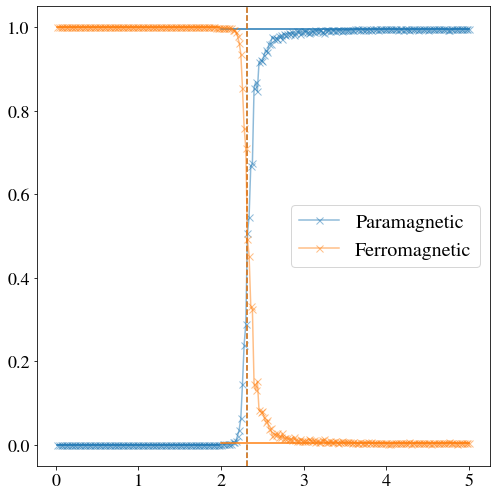

Prediction for 900 neurons in hidden layer
Lower bound (Paramagnetic): 0.000153429845813616
Higher bound (Paramagnetic): 0.9983257289026262
Half of height (Paramagnetic): 0.49923957937421987
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.9998449182510373
Higher bound (Ferromagnetic): 0.0016742861036382894
Half of height (Ferromagnetic): 0.5007596021773377
Critical temperature (Ferromagnetic): 2.32


<Figure size 432x288 with 0 Axes>

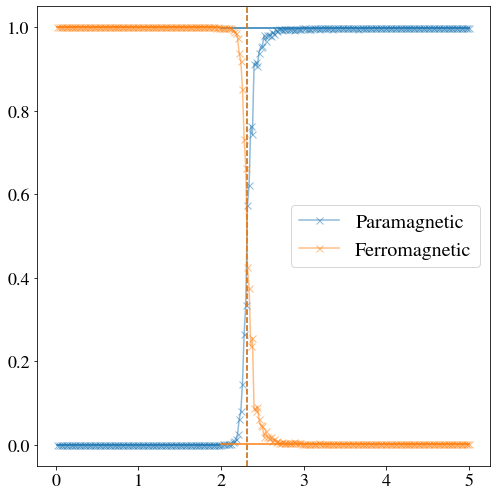

Prediction for 950 neurons in hidden layer
Lower bound (Paramagnetic): 0.000830167991807632
Higher bound (Paramagnetic): 0.9987569650014214
Half of height (Paramagnetic): 0.49979356649661455
Critical temperature (Paramagnetic): 2.3000000000000003
Lower bound (Ferromagnetic): 0.9991687214374524
Higher bound (Ferromagnetic): 0.0012430385800589294
Half of height (Ferromagnetic): 0.5002058800087557
Critical temperature (Ferromagnetic): 2.3000000000000003


<Figure size 432x288 with 0 Axes>

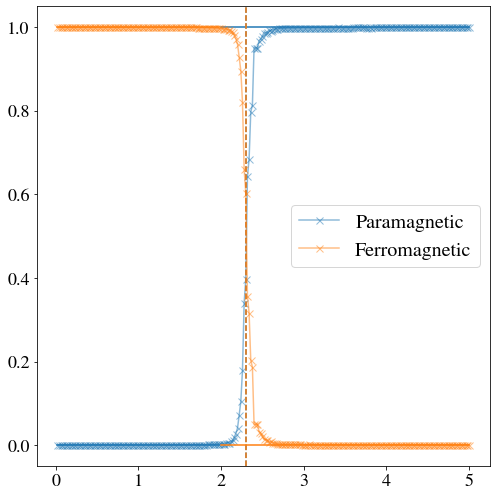

Prediction for 1000 neurons in hidden layer
Lower bound (Paramagnetic): 0.00039142564346543
Higher bound (Paramagnetic): 0.998989120417948
Half of height (Paramagnetic): 0.4996902730307067
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.9996072936058036
Higher bound (Ferromagnetic): 0.001010884846989749
Half of height (Ferromagnetic): 0.5003090892263967
Critical temperature (Ferromagnetic): 2.32


<Figure size 432x288 with 0 Axes>

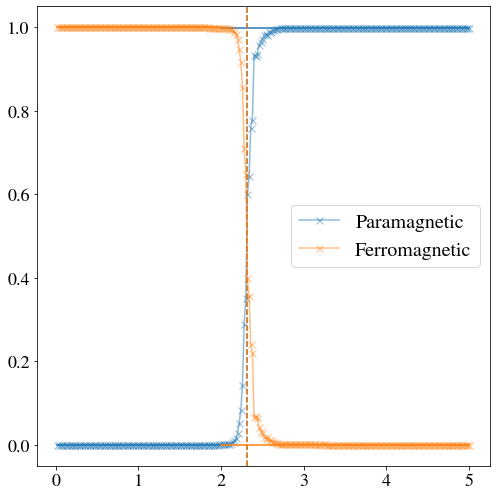

<Figure size 432x288 with 0 Axes>

In [13]:
critical_temperature = []

for neuron in neurons:
	prediction = pd.read_csv(resultsfolder+f'/predictions_{neuron}.csv', header=0).to_numpy(float)
	print(f'Prediction for {neuron} neurons in hidden layer')

	temperature, para, ferro = prediction[1:].T

	index_temp_1 = np.where(temperature == 1)[0][0]

	index_temp_3 = np.where(temperature == 4)[0][0]
	
	plt.figure(figsize=(7, 7))

	tc = []

	for index, feature in enumerate([para, ferro]):
		color = colors[index]
		
		plt.plot(temperature, feature, 'x-', markerfacecolor=None, markersize=7, label = f'{names[index]}', color=color, alpha=0.5)

		popt_first, pcov_first = curve_fit(constant_func, temperature[:index_temp_1+1], feature[:index_temp_1+1])
		popt_last, pcov_last = curve_fit(constant_func, temperature[index_temp_3:], feature[index_temp_3:])

		plt.plot(temperature[:(np.where(temperature == 2)[0][0])], 
			constant_func(temperature[:(np.where(temperature == 2)[0][0])], *popt_first), color=color)

		plt.plot(temperature[(np.where(temperature == 2)[0][0]):], 
			constant_func(temperature[(np.where(temperature == 2)[0][0]):], *popt_last), color=color)
		
		print(f'Lower bound ({names[index]}): {popt_first[0]}')
		print(f'Higher bound ({names[index]}): {popt_last[0]}')
		
		half_of_height = (popt_first[0]+popt_last[0])/2
		
		closest_index = np.abs(feature - half_of_height *np.ones_like(feature)).argmin()

		closest_x = temperature[closest_index]

		plt.axvline(x=closest_x, color = color, linestyle = '--')
		
		print(f'Half of height ({names[index]}): {half_of_height}')
		print(f'Critical temperature ({names[index]}): {closest_x}')
		tc.append(closest_x)
		
	plt.legend()
	plt.show()
	plt.savefig(saving_folder+f'/critical_temperature_{neuron}.pdf')

	mean_temperature = np.mean(tc)

	critical_temperature.append(mean_temperature)

In [16]:
temp = pd.DataFrame((np.concatenate((np.array(neurons).reshape(len(neurons),1), 
                                    np.array(critical_temperatures).reshape(len(neurons),1)),axis=1)), 
                                    columns=['Neurons','Temperature'])
temp.to_csv(os.path.join(resultsfolder, 'critical_temperatures(half).csv'), index=False)

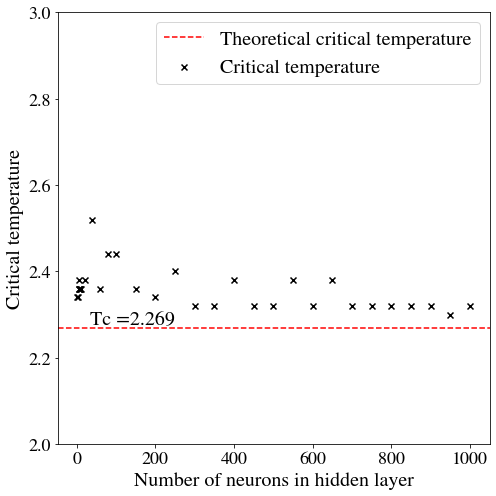

In [15]:
plt.figure(figsize=(7, 7))


plt.scatter(neurons[1:], critical_temperature[1:], marker='x', color='black', label='Critical temperature') # excluding the first neuron
plt.axhline(y=2.269, color = 'red', linestyle = '--', label = 'Theoretical critical temperature')

plt.xlabel('Number of neurons in hidden layer')
plt.ylabel('Critical temperature')

plt.text(250, 2.269, rf'Tc ={2.269}', color='black', 
        verticalalignment='bottom', horizontalalignment='right', fontsize=20)

plt.ylim((2, 3))
plt.legend()
plt.savefig(os.path.join(saving_folder, 'critical_temperature(half).pdf'))
plt.show()